In [1]:
# Importing all the necessary libraries:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from pathlib import Path

plt.style.use('dark_background')

In [2]:
base_path=Path.cwd().parent
csv_path=base_path/"data"/"processed"/"parameters.csv"
print(csv_path)

c:\Users\khadk\OneDrive\Desktop\phylogenetics\data\processed\parameters.csv


In [3]:
trees=pd.read_csv(csv_path)
trees.shape

(100, 7)

In [4]:
trees.head()

,tree_id,lambda,lambda2,mu,psi,t_1,n_tips
0,1,1.123325,5.401703,0.842113,0.314456,124.096738,327
1,2,1.135100,5.663097,0.183209,0.346676,56.224044,657
2,3,1.044302,3.525717,0.214604,0.335961,110.216780,587
3,4,1.083984,4.488419,0.748563,0.420944,98.039153,452
4,5,0.653493,2.775353,0.459062,0.345533,110.283287,791


In [5]:
trees.isnull().mean()*100

tree_id    0.0
lambda     0.0
lambda2    0.0
mu         0.0
psi        0.0
t_1        0.0
n_tips     0.0
dtype: float64

In [6]:
trees.duplicated().sum()

np.int64(0)

In [7]:
trees.describe().T

,count,mean,std,min,25%,50%,75%,max
tree_id,100.0,50.500000,29.011492,1.000000,25.750000,50.500000,75.250000,100.000000
lambda,100.0,0.764276,0.256886,0.303587,0.554263,0.755198,0.974495,1.193973
lambda2,100.0,4.050296,1.195205,1.417568,3.107102,4.096523,5.051610,5.965372
mu,100.0,0.324174,0.217003,0.012902,0.147313,0.284433,0.459558,0.953252
psi,100.0,0.391875,0.118646,0.200171,0.296825,0.361043,0.499005,0.599584
t_1,100.0,101.267683,50.921445,17.409778,60.442258,97.462585,147.099907,184.746257
n_tips,100.0,600.530000,249.796744,144.000000,356.750000,614.500000,813.500000,1000.000000


In [8]:
trees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   tree_id  100 non-null    int64  
 1   lambda   100 non-null    float64
 2   lambda2  100 non-null    float64
 3   mu       100 non-null    float64
 4   psi      100 non-null    float64
 5   t_1      100 non-null    float64
 6   n_tips   100 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 5.6 KB


In [9]:
def plot_kde(df:pd.DataFrame,cols:str):
    fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(12,6))
    axes=axes.flatten()
    for index,col in enumerate(cols):
        if index<len(axes):
            sns.kdeplot(df[col],fill=True,color='purple',ax=axes[index])
            axes[index].set_title(f'KDE of {col}')
    plt.tight_layout()
    plt.show()

In [10]:
num_cols=[col for col in trees.columns if col!='tree_id']
num_cols

['lambda', 'lambda2', 'mu', 'psi', 't_1', 'n_tips']

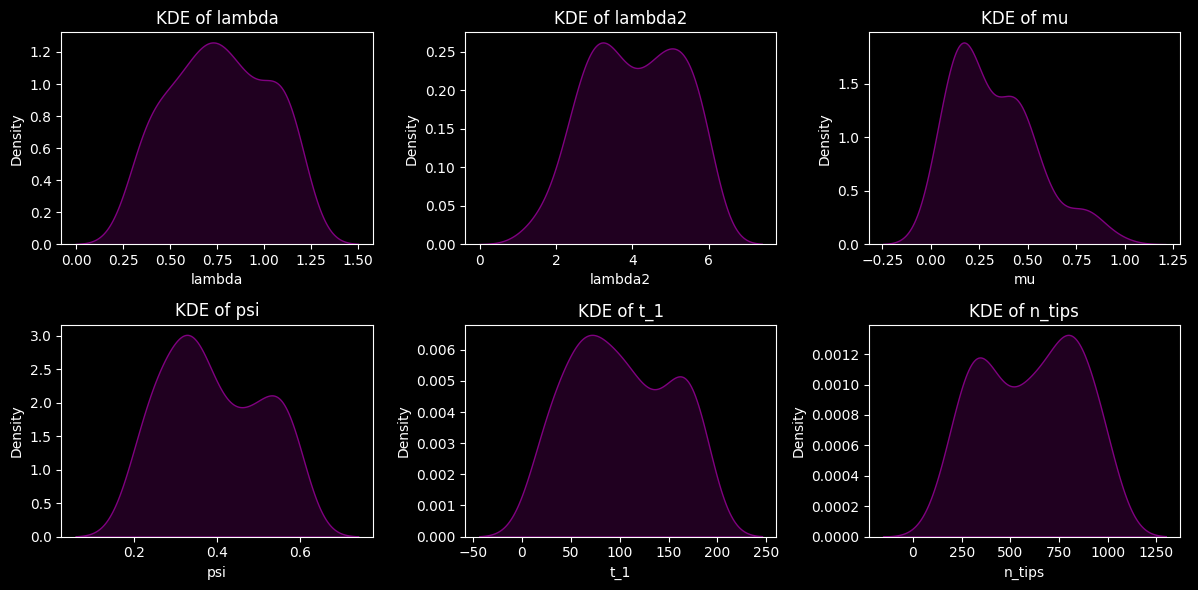

In [11]:
plot_kde(trees,num_cols)